In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu45.csv')
data.head()

MSTATUS  TRAVTIME  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  CLM_AMT  \
0        1        14         0        1      4461         2        0   
1        1        22         0        1         0         0        0   
2        1        26         4        1         0         0        0   
3        0         5         5        0     38690         2        0   
4        0        32         0        1         0         0        0   

   CLAIM_FLAG  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


       MSTATUS  TRAVTIME  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  CLM_AMT
0            1        14         0        1      4461         2        0
1            1        22         0        1         0         0        0
2            1        26         4        1         0         0        0
3            0         5         5        0     38690         2        0
4            0        32         0        1         0         0        0
...        ...       ...       ...      ...       ...       ...      ...
10297        0        21         0        0         0         0        0
10298        0        36         1        0         0         0        0
10299        0        12         5        0         0         0        0
10300        0        36         0        0         0         0        0
10301        0        64         0        0         0         0        0

[10302 rows x 7 columns]
0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0

In [4]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Class distribution in predictions: [1509  552]
Accuracy: 0.9966035904900534
Precision: 0.9963768115942029
Recall: 0.990990990990991
F1-score: 0.993676603432701
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1506
           1       1.00      0.99      0.99       555

    accuracy                           1.00      2061
   macro avg       1.00      0.99      1.00      2061
weighted avg       1.00      1.00      1.00      2061



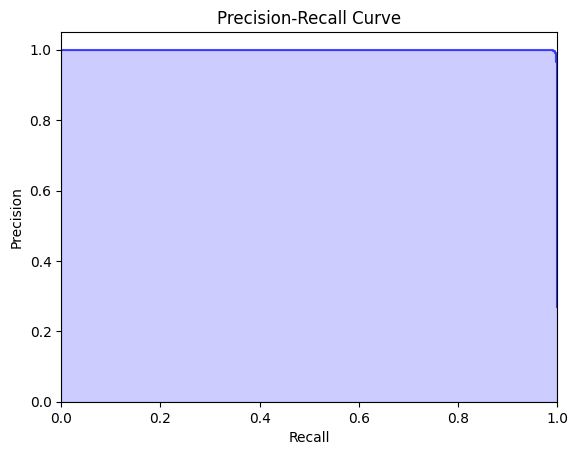

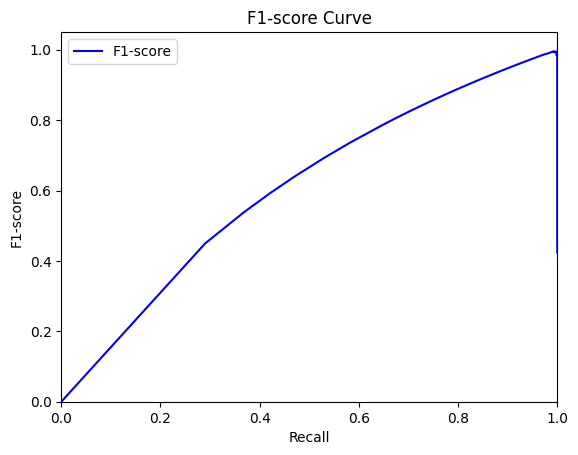

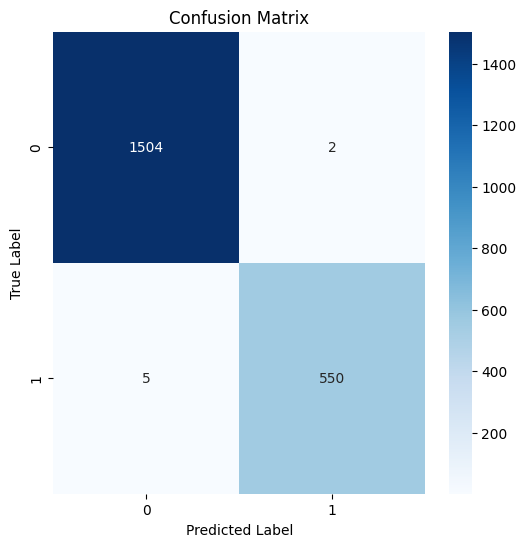

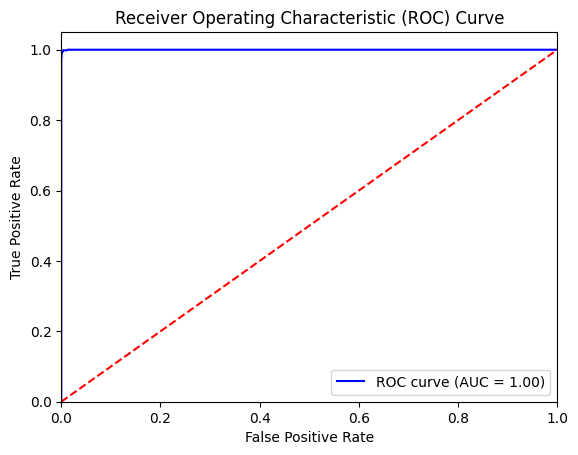

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Extra Trees Classifier with desired parameters
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model on the resampled dataset
extra_trees.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = extra_trees.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = extra_trees.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu41.csv')
data.head()

KIDSDRIV  HOMEKIDS  PARENT1  MSTATUS  TRAVTIME  BLUEBOOK  OLDCLAIM  \
0         0         0        0        1        14     14230      4461   
1         0         0        0        1        22     14940         0   
2         0         0        0        1        26     21970         0   
3         0         1        0        0         5      4010     38690   
4         0         0        0        0        32     15440         0   

   CLM_FREQ  REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
0         2        0        3        0     18.0           0  
1         0        0        0        0      1.0           0  
2         0        0        2        0     10.0           0  
3         2        0        3        0     10.0           0  
4         0        0        0        0      6.0           0

In [7]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


       KIDSDRIV  HOMEKIDS  PARENT1  MSTATUS  TRAVTIME  BLUEBOOK  OLDCLAIM  \
0             0         0        0        1        14     14230      4461   
1             0         0        0        1        22     14940         0   
2             0         0        0        1        26     21970         0   
3             0         1        0        0         5      4010     38690   
4             0         0        0        0        32     15440         0   
...         ...       ...      ...      ...       ...       ...       ...   
10297         1         2        0        0        21     13270         0   
10298         0         0        0        0        36     24490         0   
10299         0         0        0        0        12     13820         0   
10300         0         0        0        0        36     22550         0   
10301         0         0        0        0        64     19400         0   

       CLM_FREQ  REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  
0             2      

In [8]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Class distribution in predictions: [1511  550]
Accuracy: 0.9956331877729258
Precision: 0.9963636363636363
Recall: 0.9873873873873874
F1-score: 0.9918552036199095
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1506
           1       1.00      0.99      0.99       555

    accuracy                           1.00      2061
   macro avg       1.00      0.99      0.99      2061
weighted avg       1.00      1.00      1.00      2061



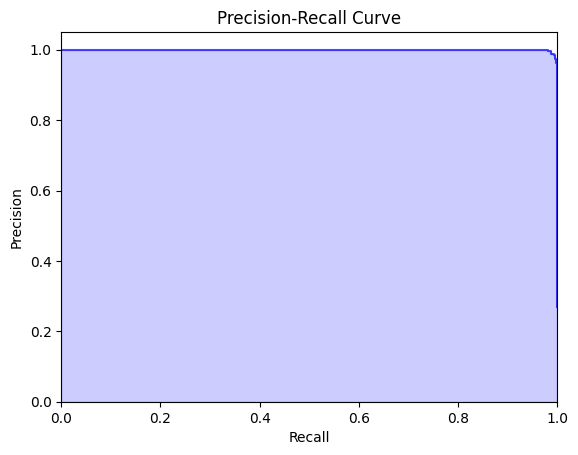

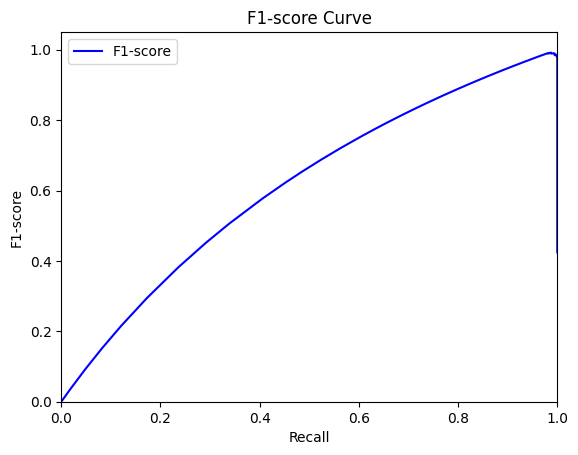

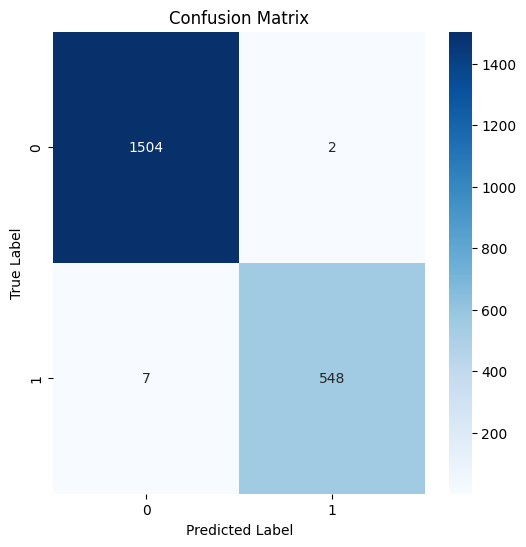

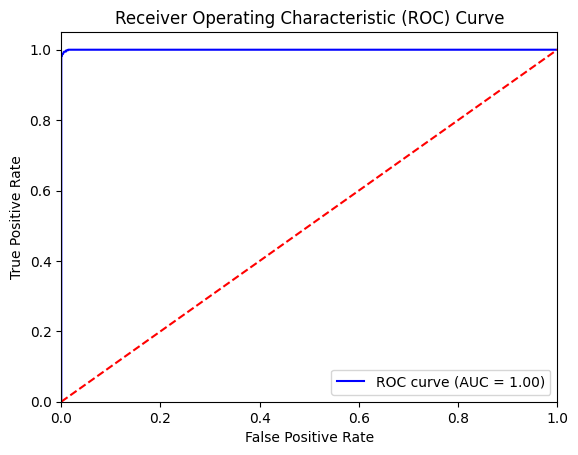

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Extra Trees Classifier with desired parameters
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model on the resampled dataset
extra_trees.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = extra_trees.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = extra_trees.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [10]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu42.csv')
data.head()

AGE  HOMEKIDS  PARENT1  GENDER  CAR_USE  BLUEBOOK  RED_CAR  OLDCLAIM  \
0  60.0         0        0       0        1     14230        1      4461   
1  43.0         0        0       0        0     14940        1         0   
2  48.0         0        0       0        1     21970        1         0   
3  35.0         1        0       1        1      4010        0     38690   
4  51.0         0        0       0        1     15440        1         0   

   CLM_FREQ  REVOKED  MVR_PTS  CLM_AMT  CLAIM_FLAG  
0         2        0        3        0           0  
1         0        0        0        0           0  
2         0        0        2        0           0  
3         2        0        3        0           0  
4         0        0        0        0           0

In [11]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


        AGE  HOMEKIDS  PARENT1  GENDER  CAR_USE  BLUEBOOK  RED_CAR  OLDCLAIM  \
0      60.0         0        0       0        1     14230        1      4461   
1      43.0         0        0       0        0     14940        1         0   
2      48.0         0        0       0        1     21970        1         0   
3      35.0         1        0       1        1      4010        0     38690   
4      51.0         0        0       0        1     15440        1         0   
...     ...       ...      ...     ...      ...       ...      ...       ...   
10297  45.0         2        0       0        1     13270        0         0   
10298  46.0         0        0       0        0     24490        0         0   
10299  48.0         0        0       1        1     13820        0         0   
10300  50.0         0        0       1        1     22550        0         0   
10301  52.0         0        0       1        1     19400        0         0   

       CLM_FREQ  REVOKED  MVR_PTS  CLM_

In [12]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Class distribution in predictions: [1511  550]
Accuracy: 0.9898107714701602
Precision: 0.9854545454545455
Recall: 0.9765765765765766
F1-score: 0.9809954751131221
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.99      0.98      0.98       555

    accuracy                           0.99      2061
   macro avg       0.99      0.99      0.99      2061
weighted avg       0.99      0.99      0.99      2061



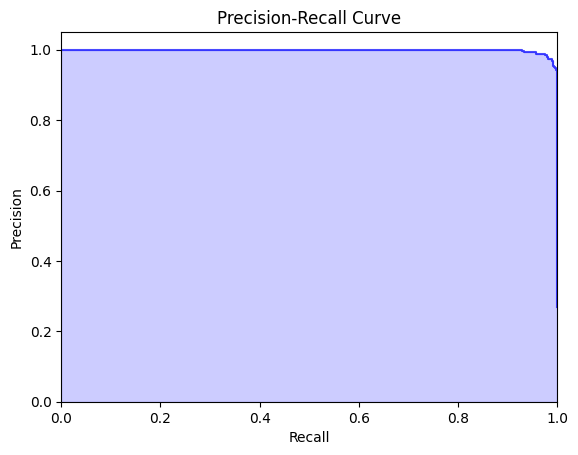

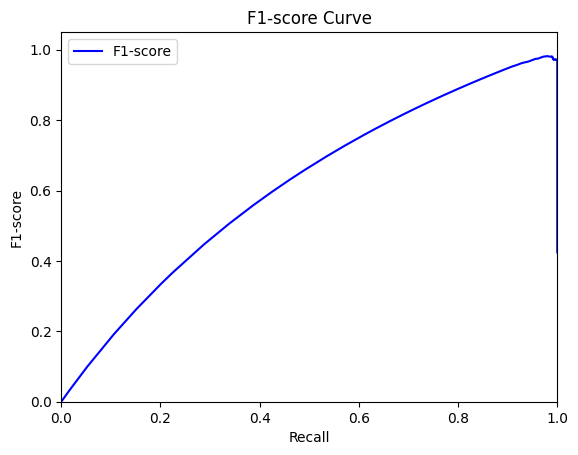

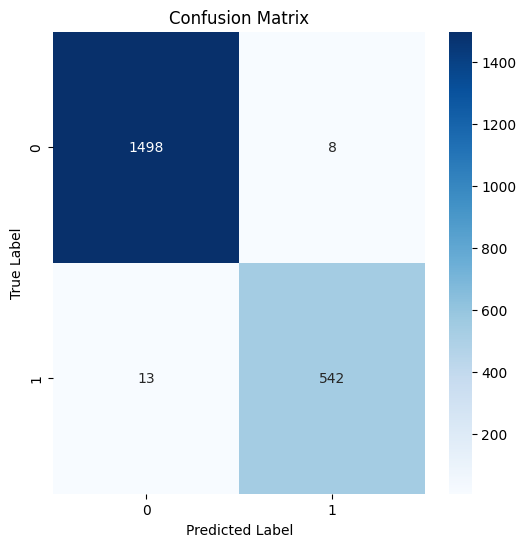

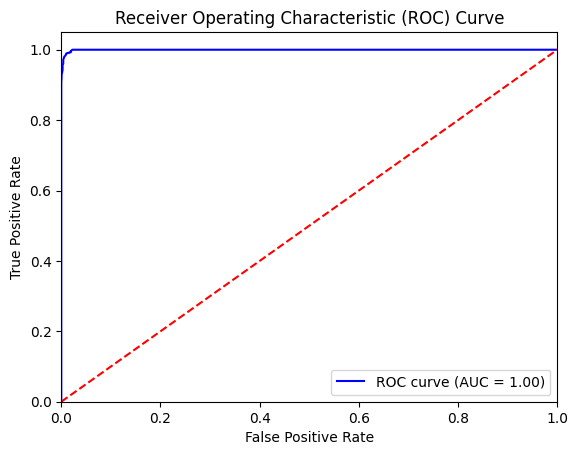

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Extra Trees Classifier with desired parameters
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model on the resampled dataset
extra_trees.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = extra_trees.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = extra_trees.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu43.csv')
data.head()

ID   AGE  MSTATUS  EDUCATION  OCCUPATION  CAR_TYPE  CLM_FREQ  \
0   63581743  60.0        1          3           6         0         2   
1  132761049  43.0        1          4           8         0         0   
2  921317019  48.0        1          1           5         4         0   
3  727598473  35.0        0          4           1         5         2   
4  450221861  51.0        0          0           8         0         0   

   MVR_PTS  CLM_AMT  CLAIM_FLAG  
0        3        0           0  
1        0        0           0  
2        2        0           0  
3        3        0           0  
4        0        0           0

In [15]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


              ID   AGE  MSTATUS  EDUCATION  OCCUPATION  CAR_TYPE  CLM_FREQ  \
0       63581743  60.0        1          3           6         0         2   
1      132761049  43.0        1          4           8         0         0   
2      921317019  48.0        1          1           5         4         0   
3      727598473  35.0        0          4           1         5         2   
4      450221861  51.0        0          0           8         0         0   
...          ...   ...      ...        ...         ...       ...       ...   
10297   67790126  45.0        0          3           5         0         0   
10298   61970712  46.0        0          2           0         1         0   
10299  849208064  48.0        0          0           8         5         0   
10300  627828331  50.0        0          1           3         0         0   
10301  680381960  52.0        0          4           1         0         0   

       MVR_PTS  CLM_AMT  
0            3        0  
1          

In [16]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Class distribution in predictions: [1514  547]
Accuracy: 0.9961183891314895
Precision: 1.0
Recall: 0.9855855855855856
F1-score: 0.9927404718693285
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1506
           1       1.00      0.99      0.99       555

    accuracy                           1.00      2061
   macro avg       1.00      0.99      1.00      2061
weighted avg       1.00      1.00      1.00      2061



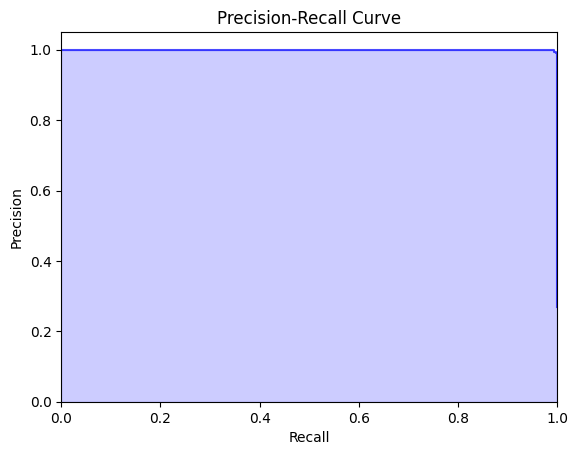

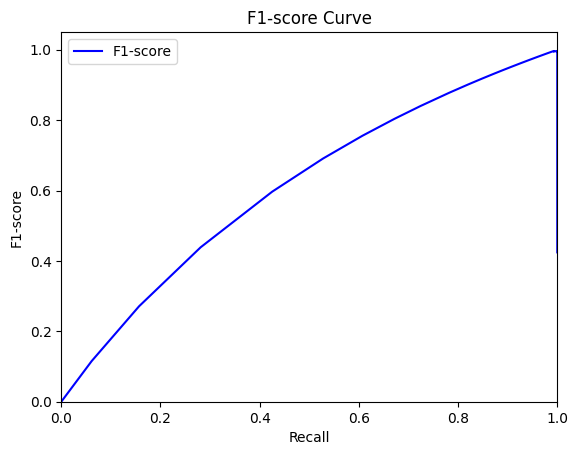

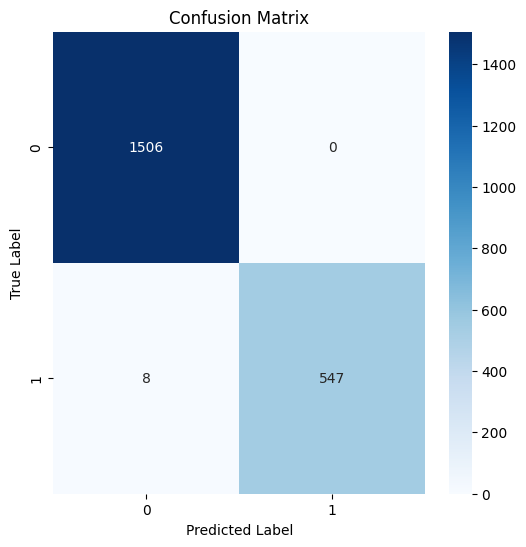

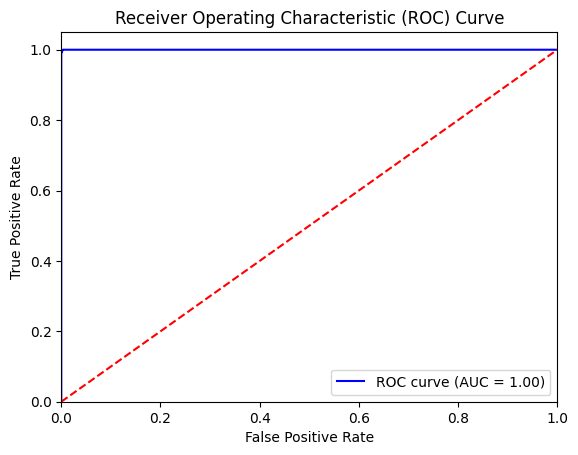

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Extra Trees Classifier with desired parameters
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model on the resampled dataset
extra_trees.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = extra_trees.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = extra_trees.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [19]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu44.csv')
data.head()

KIDSDRIV  HOMEKIDS  PARENT1  MSTATUS  OCCUPATION  BLUEBOOK  CAR_TYPE  \
0         0         0        0        1           6     14230         0   
1         0         0        0        1           8     14940         0   
2         0         0        0        1           5     21970         4   
3         0         1        0        0           1      4010         5   
4         0         0        0        0           8     15440         0   

   OLDCLAIM  CLM_FREQ  REVOKED  MVR_PTS  CLM_AMT  CLAIM_FLAG  
0      4461         2        0        3        0           0  
1         0         0        0        0        0           0  
2         0         0        0        2        0           0  
3     38690         2        0        3        0           0  
4         0         0        0        0        0           0

In [20]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


       KIDSDRIV  HOMEKIDS  PARENT1  MSTATUS  OCCUPATION  BLUEBOOK  CAR_TYPE  \
0             0         0        0        1           6     14230         0   
1             0         0        0        1           8     14940         0   
2             0         0        0        1           5     21970         4   
3             0         1        0        0           1      4010         5   
4             0         0        0        0           8     15440         0   
...         ...       ...      ...      ...         ...       ...       ...   
10297         1         2        0        0           5     13270         0   
10298         0         0        0        0           0     24490         1   
10299         0         0        0        0           8     13820         5   
10300         0         0        0        0           3     22550         0   
10301         0         0        0        0           1     19400         0   

       OLDCLAIM  CLM_FREQ  REVOKED  MVR_PTS  CLM_AM

In [21]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Class distribution in predictions: [1510  551]
Accuracy: 0.9932071809801067
Precision: 0.9909255898366606
Recall: 0.9837837837837838
F1-score: 0.9873417721518987
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1506
           1       0.99      0.98      0.99       555

    accuracy                           0.99      2061
   macro avg       0.99      0.99      0.99      2061
weighted avg       0.99      0.99      0.99      2061



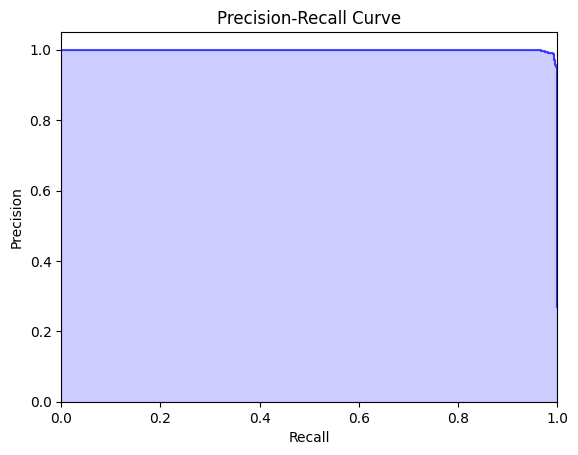

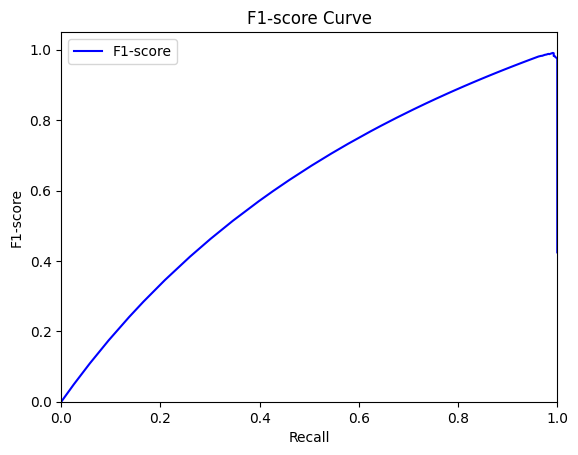

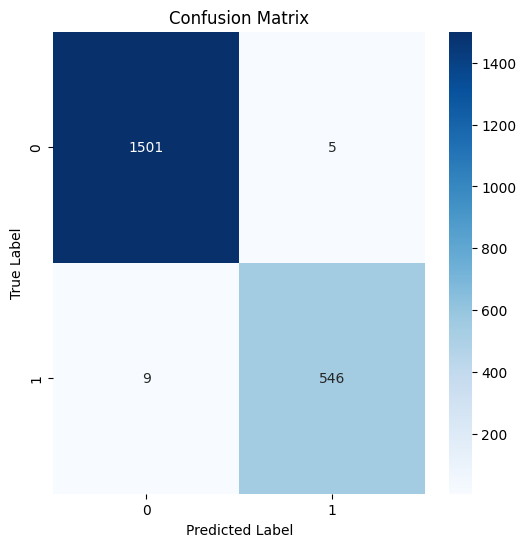

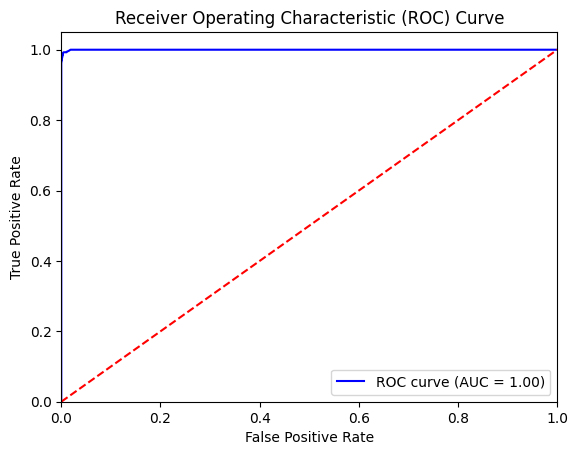

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Extra Trees Classifier with desired parameters
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model on the resampled dataset
extra_trees.fit(X_train_resampled, y_train_resampled)

# Model testing and evaluation
y_pred = extra_trees.predict(X_test)

# Check for class imbalance in predictions
pred_distribution = np.bincount(y_pred)
print("Class distribution in predictions:", pred_distribution)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = extra_trees.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
